In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Extracted_Features.csv')
data = data.dropna()
data


,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,max_fixations_full,max_saccades_full,max_diametro_full,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Binary
0,1,1,533.025280,160.423178,40.676603,236.200000,233.062500,39.534199,1303.125000,414.062500,...,2364,621,56.098621,651.847840,161.042347,13.344737,48,35,25,0
1,1,2,959.141261,118.256765,41.718083,543.625000,224.375000,37.589233,1859.500000,399.937500,...,2630,565,80.965363,829.541125,150.093936,12.588451,40,28,33,1
2,1,4,618.470264,157.264000,38.525371,257.750000,232.312500,33.263347,1465.625000,430.750000,...,2211,653,55.277233,685.965108,171.631852,14.020381,51,37,37,1
3,1,6,388.826547,172.173720,38.225977,210.250000,233.500000,33.678094,1061.062500,413.250000,...,1686,637,78.819977,481.533646,177.598579,15.688681,52,38,18,0
4,1,7,416.682170,191.483547,37.850256,193.333333,235.000000,34.204060,1107.562500,523.562500,...,1824,1106,76.008530,534.620834,216.905087,13.772832,53,33,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,433,21,413.759201,272.099505,43.226224,200.000000,88.125000,14.555465,1131.875000,746.437500,...,2328,1785,94.056313,594.567670,371.586232,19.143375,59,126,4,0
3434,433,22,713.084441,198.303046,38.480120,196.687500,103.125000,22.076219,1580.875000,638.062500,...,2558,986,64.859375,799.131948,242.222748,10.201133,51,100,39,1
3435,433,23,532.374389,233.595994,34.061647,193.375000,96.437500,21.677002,1361.750000,615.187500,...,2622,1197,72.476982,732.873481,269.992910,10.125300,70,118,2,0
3436,433,45,562.554638,220.089855,37.764686,128.823529,100.588235,22.597800,1371.058824,596.352941,...,3272,935,84.657867,951.873395,235.670440,16.408542,78,123,47,1


In [3]:
features = ['mean_fixations_small', 'mean_saccades_small', 'mean_diametro_small',
            'min_fixations_small', 'min_saccades_small', 'min_diametro_small',
            'max_fixations_small', 'max_saccades_small', 'max_diametro_small',
            'std_fixations_small', 'std_saccades_small', 'std_diametro_small',
            'num_diff_nonzero_fixations_small', 'num_diff_nonzero_saccades_small',
            'mean_fixations_medium', 'mean_saccades_medium', 'mean_diametro_medium',
            'min_fixations_medium', 'min_saccades_medium', 'min_diametro_medium',
            'max_fixations_medium', 'max_saccades_medium', 'max_diametro_medium',
            'std_fixations_medium', 'std_saccades_medium', 'std_diametro_medium',
            'num_diff_nonzero_fixations_medium', 'num_diff_nonzero_saccades_medium',
            'mean_fixations_full', 'mean_saccades_full', 'mean_diametro_full',
            'min_fixations_full', 'min_saccades_full', 'min_diametro_full',
            'max_fixations_full', 'max_saccades_full', 'max_diametro_full',
            'std_fixations_full', 'std_saccades_full', 'std_diametro_full',
            'num_diff_nonzero_fixations_full', 'num_diff_nonzero_saccades_full']

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Binary']

# Dizionario per memorizzare i risultati
results = {}

for painting in data['PAINTING'].unique():
    subset = data[data['PAINTING'] == painting]
    X_train, X_test, y_train, y_test = train_test_split(subset[features], subset['Binary'], test_size=0.3, random_state=42)
    
    # Calcolo delle percentuali di 0 e 1 nella colonna 'Binary'
    count_binary = subset['Binary'].value_counts(normalize=True) * 100
    percent_0 = count_binary.get(0, 0)
    percent_1 = count_binary.get(1, 0)
    
    # Creazione dei modelli
    models = {
        'Logistic Regression': LogisticRegression(max_iter=10000),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier()
    }
    
    # Dizionario per memorizzare l'accuratezza per ogni modello
    accuracies = {}
    
    # Training e test per ogni modello
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[model_name] = accuracy_score(y_test, y_pred)
    
    # Memorizzazione dei risultati
    results[painting] = {
        'Accuracy': accuracies,
        'Percent 0': percent_0,
        'Percent 1': percent_1,
        'Total Samples': len(subset)
    }

# Step 3: Ordinamento dei risultati
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: max(item[1]['Accuracy'].values()), reverse=True)}

# Stampa dei risultati in formato report
for painting, info in sorted_results.items():
    print(f"PAINTING: {painting}")
    print(f"Total Samples: {info['Total Samples']}")
    print(f"Percent 0: {info['Percent 0']:.2f}%")
    print(f"Percent 1: {info['Percent 1']:.2f}%")
    for model, accuracy in info['Accuracy'].items():
        print(f"{model}: {accuracy:.2f}")
    print("\n")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

PAINTING: 9
Total Samples: 189
Percent 0: 19.58%
Percent 1: 80.42%
Logistic Regression: 0.72
SVM: 0.79
Random Forest: 0.75
Decision Tree: 0.70


PAINTING: 10
Total Samples: 189
Percent 0: 20.11%
Percent 1: 79.89%
Logistic Regression: 0.70
SVM: 0.77
Random Forest: 0.72
Decision Tree: 0.65


PAINTING: 20
Total Samples: 188
Percent 0: 37.77%
Percent 1: 62.23%
Logistic Regression: 0.54
SVM: 0.70
Random Forest: 0.53
Decision Tree: 0.44


PAINTING: 6
Total Samples: 188
Percent 0: 37.77%
Percent 1: 62.23%
Logistic Regression: 0.49
SVM: 0.68
Random Forest: 0.63
Decision Tree: 0.54


PAINTING: 11
Total Samples: 188
Percent 0: 37.77%
Percent 1: 62.23%
Logistic Regression: 0.60
SVM: 0.68
Random Forest: 0.54
Decision Tree: 0.42


PAINTING: 15
Total Samples: 190
Percent 0: 34.74%
Percent 1: 65.26%
Logistic Regression: 0.54
SVM: 0.68
Random Forest: 0.60
Decision Tree: 0.54


PAINTING: 45
Total Samples: 17
Percent 0: 58.82%
Percent 1: 41.18%
Logistic Regression: 0.33
SVM: 0.67
Random Forest: 0.67
Dec

Training e Testing con cross-validation di secondo livello

Bilancio il dataset
Train-Validation-Test Split



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold

import numpy as np

X = data[features]
y = data['Binary']

# Dizionario per memorizzare i risultati
results = {}

for painting in data['PAINTING'].unique():
    subset = data[data['PAINTING'] == painting]
    
    # Bilanciamento delle classi
    min_class_size = subset['Binary'].value_counts().min()
    balanced_subset = subset.groupby('Binary').sample(n=min_class_size, random_state=42)
    
    # Suddivisione del dataset in train e test
    X_train, X_test, y_train, y_test = train_test_split(balanced_subset[features], balanced_subset['Binary'], test_size=0.1, random_state=42)
    
    # Preparazione per cross-validation di secondo livello
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = {model_name: [] for model_name in ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree']}
    
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]

        # Creazione dei modelli
        models = {
            'Logistic Regression': LogisticRegression(max_iter=10000),
            'SVM': SVC(),
            'Random Forest': RandomForestClassifier(),
            'Decision Tree': DecisionTreeClassifier()
        }
        
        # Training e validazione per ogni modello e fold
        for model_name, model in models.items():
            model.fit(X_train_cv, y_train_cv)
            y_pred_cv = model.predict(X_val_cv)
            cv_results[model_name].append(accuracy_score(y_val_cv, y_pred_cv))
    
    # Calcolo della media delle performance dei modelli sulla cross-validation
    average_cv_accuracy = {model: np.mean(scores) for model, scores in cv_results.items()}
    
    # Memorizzazione dei risultati
    results[painting] = {
        'CV Average Accuracy': average_cv_accuracy,
        'Total Samples': len(balanced_subset)
    }
    print(painting)

# Ordinamento dei risultati basato sulla migliore accuracy media di CV
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: max(item[1]['CV Average Accuracy'].values()), reverse=True)}

# Stampa dei risultati in formato report
for painting, info in sorted_results.items():
    print(f"PAINTING: {painting}")
    print(f"Total Samples: {info['Total Samples']}")
    for model, avg_accuracy in info['CV Average Accuracy'].items():
        print(f"{model}: {avg_accuracy:.2f}")
    print("\n")


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

1


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

2


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

4


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

6


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

7


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

9
10


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

11


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

13


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

14


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

16


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

18


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

20


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

21


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

22


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

23
45


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

47
PAINTING: 14
Total Samples: 126
Logistic Regression: 0.53
SVM: 0.54
Random Forest: 0.52
Decision Tree: 0.63


PAINTING: 13
Total Samples: 132
Logistic Regression: 0.44
SVM: 0.49
Random Forest: 0.55
Decision Tree: 0.63


PAINTING: 15
Total Samples: 132
Logistic Regression: 0.51
SVM: 0.63
Random Forest: 0.59
Decision Tree: 0.49


PAINTING: 9
Total Samples: 74
Logistic Regression: 0.46
SVM: 0.47
Random Forest: 0.56
Decision Tree: 0.63


PAINTING: 47
Total Samples: 164
Logistic Regression: 0.48
SVM: 0.56
Random Forest: 0.54
Decision Tree: 0.61


PAINTING: 4
Total Samples: 122
Logistic Regression: 0.51
SVM: 0.49
Random Forest: 0.59
Decision Tree: 0.55


PAINTING: 16
Total Samples: 154
Logistic Regression: 0.46
SVM: 0.49
Random Forest: 0.53
Decision Tree: 0.59


PAINTING: 21
Total Samples: 150
Logistic Regression: 0.56
SVM: 0.47
Random Forest: 0.56
Decision Tree: 0.58


PAINTING: 20
Total Samples: 142
Logistic Regression: 0.55
SVM: 0.51
Random Forest: 0.57
Decision Tree: 0.57


PAINTING: 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Binary']

# Dizionario per memorizzare i risultati
results = {}

for painting in data['PAINTING'].unique():
    subset = data[data['PAINTING'] == painting]

    # Bilanciamento delle classi
    min_class_size = subset['Binary'].value_counts().min()
    balanced_subset = subset.groupby('Binary').sample(n=min_class_size, random_state=42)

    subset = balanced_subset

    X_train, X_test, y_train, y_test = train_test_split(subset[features], subset['Binary'], test_size=0.3, random_state=42)
    
    # Calcolo delle percentuali di 0 e 1 nella colonna 'Binary'
    count_binary = subset['Binary'].value_counts(normalize=True) * 100
    percent_0 = count_binary.get(0, 0)
    percent_1 = count_binary.get(1, 0)
    
    # Creazione dei modelli
    models = {
        'Logistic Regression': LogisticRegression(max_iter=10000),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier()
    }
    
    # Dizionario per memorizzare l'accuratezza per ogni modello
    accuracies = {}
    
    # Training e test per ogni modello
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[model_name] = accuracy_score(y_test, y_pred)
    
    # Memorizzazione dei risultati
    results[painting] = {
        'Accuracy': accuracies,
        'Percent 0': percent_0,
        'Percent 1': percent_1,
        'Total Samples': len(subset)
    }

# Step 3: Ordinamento dei risultati
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: max(item[1]['Accuracy'].values()), reverse=True)}

# Stampa dei risultati in formato report
for painting, info in sorted_results.items():
    print(f"PAINTING: {painting}")
    print(f"Total Samples: {info['Total Samples']}")
    print(f"Percent 0: {info['Percent 0']:.2f}%")
    print(f"Percent 1: {info['Percent 1']:.2f}%")
    for model, accuracy in info['Accuracy'].items():
        print(f"{model}: {accuracy:.2f}")
    print("\n")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

PAINTING: 10
Total Samples: 76
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.43
SVM: 0.48
Random Forest: 0.74
Decision Tree: 0.52


PAINTING: 15
Total Samples: 132
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.65
SVM: 0.60
Random Forest: 0.55
Decision Tree: 0.68


PAINTING: 13
Total Samples: 132
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.45
SVM: 0.42
Random Forest: 0.62
Decision Tree: 0.65


PAINTING: 22
Total Samples: 138
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.40
SVM: 0.48
Random Forest: 0.52
Decision Tree: 0.64


PAINTING: 47
Total Samples: 164
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.40
SVM: 0.62
Random Forest: 0.56
Decision Tree: 0.64


PAINTING: 4
Total Samples: 122
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.38
SVM: 0.51
Random Forest: 0.62
Decision Tree: 0.54


PAINTING: 6
Total Samples: 142
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.53
SVM: 0.58
Random Forest: 0.60
Dec

In [9]:
print(sorted_results)

{10: {'Accuracy': {'Logistic Regression': 0.43478260869565216, 'SVM': 0.4782608695652174, 'Random Forest': 0.7391304347826086, 'Decision Tree': 0.5217391304347826}, 'Percent 0': 50.0, 'Percent 1': 50.0, 'Total Samples': 76}, 15: {'Accuracy': {'Logistic Regression': 0.65, 'SVM': 0.6, 'Random Forest': 0.55, 'Decision Tree': 0.675}, 'Percent 0': 50.0, 'Percent 1': 50.0, 'Total Samples': 132}, 13: {'Accuracy': {'Logistic Regression': 0.45, 'SVM': 0.425, 'Random Forest': 0.625, 'Decision Tree': 0.65}, 'Percent 0': 50.0, 'Percent 1': 50.0, 'Total Samples': 132}, 22: {'Accuracy': {'Logistic Regression': 0.40476190476190477, 'SVM': 0.47619047619047616, 'Random Forest': 0.5238095238095238, 'Decision Tree': 0.6428571428571429}, 'Percent 0': 50.0, 'Percent 1': 50.0, 'Total Samples': 138}, 47: {'Accuracy': {'Logistic Regression': 0.4, 'SVM': 0.62, 'Random Forest': 0.56, 'Decision Tree': 0.64}, 'Percent 0': 50.0, 'Percent 1': 50.0, 'Total Samples': 164}, 4: {'Accuracy': {'Logistic Regression': 0.37

In [10]:
# Lista per contenere le coppie [id, max_accuracy]
max_accuracy_list = []

# Estrazione dell'accuracy più alta per ogni ID
for id, values in sorted_results.items():
    max_accuracy = max(values['Accuracy'].values())  # Trova il massimo tra le accuracies
    max_accuracy_list.append([id, max_accuracy])  # Aggiunge la coppia [id, max_accuracy] alla lista

max_accuracy_list

[[10, 0.7391304347826086],
 [15, 0.675],
 [13, 0.65],
 [22, 0.6428571428571429],
 [47, 0.64],
 [4, 0.6216216216216216],
 [6, 0.6046511627906976],
 [18, 0.6],
 [45, 0.6],
 [16, 0.5957446808510638],
 [2, 0.5952380952380952],
 [20, 0.5813953488372093],
 [14, 0.5789473684210527],
 [1, 0.5769230769230769],
 [7, 0.56],
 [11, 0.5581395348837209],
 [21, 0.5555555555555556],
 [23, 0.5],
 [9, 0.4782608695652174]]

In [11]:
voto_medio_per_painting = data.groupby('PAINTING')['voto'].mean().reset_index()

# Rinominiamo le colonne per chiarezza
voto_medio_per_painting.columns = ['PAINTING', 'Voto Medio']

# Convertiamo il DataFrame in una lista di tuple
lista_voti_medio = list(voto_medio_per_painting.itertuples(index=False, name=None))

# Mostra la lista
print(lista_voti_medio)


[(1, 26.566137566137566), (2, 22.48421052631579), (4, 29.61904761904762), (6, 28.45744680851064), (7, 26.476190476190474), (9, 33.82539682539682), (10, 33.370370370370374), (11, 27.99468085106383), (13, 20.095238095238095), (14, 19.693121693121693), (15, 29.442105263157895), (16, 21.232804232804234), (18, 27.07894736842105), (20, 28.4468085106383), (21, 27.375661375661377), (22, 28.59259259259259), (23, 22.798941798941797), (45, 23.352941176470587), (47, 22.585106382978722)]


In [12]:
# Convertiamo le liste in DataFrame
df_accuracy = pd.DataFrame(max_accuracy_list, columns=['id', 'accuracy'])
df_voti = pd.DataFrame(lista_voti_medio, columns=['id', 'voto'])

# Uniamo i DataFrame sui valori di 'id'
df_merged = pd.merge(df_accuracy, df_voti, on='id')

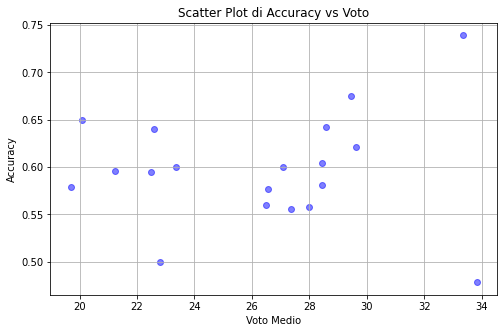

In [15]:
import matplotlib.pyplot as plt

# Creazione dello scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_merged['voto'], df_merged['accuracy'], color='blue', alpha=0.5)

# Aggiungiamo titoli agli assi e al grafico
plt.title('Scatter Plot di Accuracy vs Voto')
plt.xlabel('Voto Medio')
plt.ylabel('Accuracy')

# Mostra il grafico
plt.grid(True)
plt.show()

In [38]:
features = ['min_saccades_medium',
 'min_saccades_small',
 'min_saccades_full',
 'num_diff_nonzero_saccades_medium',
 'num_diff_nonzero_saccades_small',
 'num_diff_nonzero_saccades_full',
 'min_diametro_full',
 'num_diff_nonzero_fixations_full']

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Binary']

# Dizionario per memorizzare i risultati
results = {}

for painting in data['PAINTING'].unique():
    subset = data[data['PAINTING'] == painting]

    # Bilanciamento delle classi
    min_class_size = subset['Binary'].value_counts().min()
    balanced_subset = subset.groupby('Binary').sample(n=min_class_size, random_state=42)

    subset = balanced_subset

    X_train, X_test, y_train, y_test = train_test_split(subset[features], subset['Binary'], test_size=0.5, random_state=42)
    
    # Calcolo delle percentuali di 0 e 1 nella colonna 'Binary'
    count_binary = subset['Binary'].value_counts(normalize=True) * 100
    percent_0 = count_binary.get(0, 0)
    percent_1 = count_binary.get(1, 0)
    
    # Creazione dei modelli
    models = {
        'Logistic Regression': LogisticRegression(max_iter=10000),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier()
    }
    
    # Dizionario per memorizzare l'accuratezza per ogni modello
    accuracies = {}
    
    # Training e test per ogni modello
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[model_name] = accuracy_score(y_test, y_pred)
    
    # Memorizzazione dei risultati
    results[painting] = {
        'Accuracy': accuracies,
        'Percent 0': percent_0,
        'Percent 1': percent_1,
        'Total Samples': len(subset)
    }

# Step 3: Ordinamento dei risultati
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: max(item[1]['Accuracy'].values()), reverse=True)}

# Stampa dei risultati in formato report
for painting, info in sorted_results.items():
    print(f"PAINTING: {painting}")
    print(f"Total Samples: {info['Total Samples']}")
    print(f"Percent 0: {info['Percent 0']:.2f}%")
    print(f"Percent 1: {info['Percent 1']:.2f}%")
    for model, accuracy in info['Accuracy'].items():
        print(f"{model}: {accuracy:.2f}")
    print("\n")

PAINTING: 45
Total Samples: 14
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.00
SVM: 0.43
Random Forest: 0.71
Decision Tree: 0.43


PAINTING: 6
Total Samples: 142
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.55
SVM: 0.46
Random Forest: 0.56
Decision Tree: 0.66


PAINTING: 14
Total Samples: 126
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.54
SVM: 0.59
Random Forest: 0.65
Decision Tree: 0.56


PAINTING: 10
Total Samples: 76
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.53
SVM: 0.58
Random Forest: 0.58
Decision Tree: 0.63


PAINTING: 11
Total Samples: 142
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.61
SVM: 0.45
Random Forest: 0.58
Decision Tree: 0.44


PAINTING: 20
Total Samples: 142
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.54
SVM: 0.59
Random Forest: 0.54
Decision Tree: 0.48


PAINTING: 47
Total Samples: 164
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.54
SVM: 0.46
Random Forest: 0.56
Dec

In [40]:
# Lista per contenere le coppie [id, max_accuracy]
max_accuracy_list = []

# Estrazione dell'accuracy più alta per ogni ID
for id, values in sorted_results.items():
    max_accuracy = max(values['Accuracy'].values())  # Trova il massimo tra le accuracies
    max_accuracy_list.append([id, max_accuracy])  # Aggiunge la coppia [id, max_accuracy] alla lista

max_accuracy_list

[[45, 0.7142857142857143],
 [6, 0.6619718309859155],
 [14, 0.6507936507936508],
 [10, 0.631578947368421],
 [11, 0.6056338028169014],
 [20, 0.5915492957746479],
 [47, 0.5853658536585366],
 [15, 0.5757575757575758],
 [18, 0.5466666666666666],
 [1, 0.5465116279069767],
 [4, 0.5409836065573771],
 [21, 0.5333333333333333],
 [16, 0.5324675324675324],
 [23, 0.5316455696202531],
 [7, 0.5301204819277109],
 [9, 0.5135135135135135],
 [2, 0.5072463768115942],
 [22, 0.5072463768115942],
 [13, 0.48484848484848486]]

In [41]:
voto_medio_per_painting = data.groupby('PAINTING')['voto'].mean().reset_index()

# Rinominiamo le colonne per chiarezza
voto_medio_per_painting.columns = ['PAINTING', 'Voto Medio']

# Convertiamo il DataFrame in una lista di tuple
lista_voti_medio = list(voto_medio_per_painting.itertuples(index=False, name=None))

# Mostra la lista
print(lista_voti_medio)


[(1, 26.566137566137566), (2, 22.48421052631579), (4, 29.61904761904762), (6, 28.45744680851064), (7, 26.476190476190474), (9, 33.82539682539682), (10, 33.370370370370374), (11, 27.99468085106383), (13, 20.095238095238095), (14, 19.693121693121693), (15, 29.442105263157895), (16, 21.232804232804234), (18, 27.07894736842105), (20, 28.4468085106383), (21, 27.375661375661377), (22, 28.59259259259259), (23, 22.798941798941797), (45, 23.352941176470587), (47, 22.585106382978722)]


In [42]:
# Convertiamo le liste in DataFrame
df_accuracy = pd.DataFrame(max_accuracy_list, columns=['id', 'accuracy'])
df_voti = pd.DataFrame(lista_voti_medio, columns=['id', 'voto'])

# Uniamo i DataFrame sui valori di 'id'
df_merged = pd.merge(df_accuracy, df_voti, on='id')

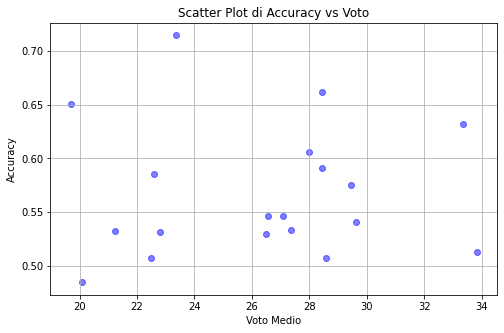

In [43]:
import matplotlib.pyplot as plt

# Creazione dello scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_merged['voto'], df_merged['accuracy'], color='blue', alpha=0.5)

# Aggiungiamo titoli agli assi e al grafico
plt.title('Scatter Plot di Accuracy vs Voto')
plt.xlabel('Voto Medio')
plt.ylabel('Accuracy')

# Mostra il grafico
plt.grid(True)
plt.show()

In [44]:
data[data['PAINTING']==45]

,ID,PAINTING,mean_fixations_small,mean_saccades_small,mean_diametro_small,min_fixations_small,min_saccades_small,min_diametro_small,max_fixations_small,max_saccades_small,...,max_fixations_full,max_saccades_full,max_diametro_full,std_fixations_full,std_saccades_full,std_diametro_full,num_diff_nonzero_fixations_full,num_diff_nonzero_saccades_full,voto,Binary
17,1,45,16163.011484,7.248903,1.669092,15893.937500,332.600000,23.893966,17257.235294,100.117647,...,26047,379,48.796249,7960.700631,52.836893,7.288566,5,5,0,0
36,2,45,2269.519269,118.094715,11.386530,1671.125000,242.642857,26.685896,3444.000000,464.562500,...,7972,1146,45.317871,2647.314151,212.889846,17.403155,45,29,0,0
721,100,45,1205.692659,112.501913,53.129677,371.750000,132.000000,49.204310,2047.812500,321.187500,...,5536,537,59.457198,1558.796177,123.704900,3.760240,74,76,5,0
3170,371,45,1132.516450,345.238989,44.582321,250.625000,243.250000,33.029822,2190.687500,868.250000,...,7076,1710,82.045570,2168.857164,393.292016,19.956490,42,53,27,1
3189,376,45,406.163972,277.165744,41.661910,158.812500,209.312500,42.499318,1167.125000,749.500000,...,2638,1913,93.952614,664.073931,372.279399,15.928206,50,44,2,0
3208,377,45,757.079564,239.739090,35.574966,319.187500,249.062500,33.547344,1632.062500,590.000000,...,2703,1041,90.850258,849.300358,245.768238,10.676393,52,40,42,1
3227,387,45,1089.436663,144.844978,45.498784,188.625000,172.937500,44.561787,2326.312500,458.625000,...,4099,1315,78.417984,1207.733704,226.834053,12.316908,52,34,25,0
3246,388,45,1329.010118,133.950538,28.093219,329.733333,179.187500,25.341157,2457.875000,383.875000,...,4728,613,40.353252,1576.320026,147.319089,6.428800,51,33,50,1
3265,389,45,750.611840,190.677776,36.879136,199.000000,195.875000,32.018771,1495.812500,522.062500,...,4341,1324,93.648216,1141.822376,307.452758,13.212144,55,38,31,1
3284,391,45,851.340567,124.705868,45.675248,387.375000,176.750000,39.424129,1575.500000,355.312500,...,2962,726,55.378109,800.033037,150.947750,10.716890,55,30,37,1


In [45]:
data = pd.read_csv('Extracted_Features_NO-OUTLIERS.csv')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Binary']

# Dizionario per memorizzare i risultati
results = {}

for painting in data['PAINTING'].unique():
    try:
        subset = data[data['PAINTING'] == painting]

        # Bilanciamento delle classi
        min_class_size = subset['Binary'].value_counts().min()
        balanced_subset = subset.groupby('Binary').sample(n=min_class_size, random_state=42)

        subset = balanced_subset

        X_train, X_test, y_train, y_test = train_test_split(subset[features], subset['Binary'], test_size=0.5, random_state=42)
        
        # Calcolo delle percentuali di 0 e 1 nella colonna 'Binary'
        count_binary = subset['Binary'].value_counts(normalize=True) * 100
        percent_0 = count_binary.get(0, 0)
        percent_1 = count_binary.get(1, 0)
        
        # Creazione dei modelli
        models = {
            'Logistic Regression': LogisticRegression(max_iter=10000),
            'SVM': SVC(),
            'Random Forest': RandomForestClassifier(),
            'Decision Tree': DecisionTreeClassifier()
        }
        
        # Dizionario per memorizzare l'accuratezza per ogni modello
        accuracies = {}
        
        # Training e test per ogni modello
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracies[model_name] = accuracy_score(y_test, y_pred)
        
        # Memorizzazione dei risultati
        results[painting] = {
            'Accuracy': accuracies,
            'Percent 0': percent_0,
            'Percent 1': percent_1,
            'Total Samples': len(subset)
        }
    except:
        print(painting)

# Step 3: Ordinamento dei risultati
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: max(item[1]['Accuracy'].values()), reverse=True)}

# Stampa dei risultati in formato report
for painting, info in sorted_results.items():
    print(f"PAINTING: {painting}")
    print(f"Total Samples: {info['Total Samples']}")
    print(f"Percent 0: {info['Percent 0']:.2f}%")
    print(f"Percent 1: {info['Percent 1']:.2f}%")
    for model, accuracy in info['Accuracy'].items():
        print(f"{model}: {accuracy:.2f}")
    print("\n")

45
PAINTING: 21
Total Samples: 24
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.67
SVM: 0.42
Random Forest: 0.42
Decision Tree: 0.75


PAINTING: 9
Total Samples: 14
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.57
SVM: 0.57
Random Forest: 0.71
Decision Tree: 0.57


PAINTING: 6
Total Samples: 40
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.50
SVM: 0.45
Random Forest: 0.60
Decision Tree: 0.70


PAINTING: 1
Total Samples: 52
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.62
SVM: 0.69
Random Forest: 0.65
Decision Tree: 0.54


PAINTING: 22
Total Samples: 42
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.57
SVM: 0.48
Random Forest: 0.57
Decision Tree: 0.67


PAINTING: 16
Total Samples: 28
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.57
SVM: 0.36
Random Forest: 0.64
Decision Tree: 0.43


PAINTING: 10
Total Samples: 16
Percent 0: 50.00%
Percent 1: 50.00%
Logistic Regression: 0.25
SVM: 0.38
Random Forest: 0.38
Decisio

In [48]:
# Lista per contenere le coppie [id, max_accuracy]
max_accuracy_list = []

# Estrazione dell'accuracy più alta per ogni ID
for id, values in sorted_results.items():
    max_accuracy = max(values['Accuracy'].values())  # Trova il massimo tra le accuracies
    max_accuracy_list.append([id, max_accuracy])  # Aggiunge la coppia [id, max_accuracy] alla lista

max_accuracy_list

[[21, 0.75],
 [9, 0.7142857142857143],
 [6, 0.7],
 [1, 0.6923076923076923],
 [22, 0.6666666666666666],
 [16, 0.6428571428571429],
 [10, 0.625],
 [18, 0.6190476190476191],
 [14, 0.5714285714285714],
 [7, 0.5652173913043478],
 [13, 0.5625],
 [47, 0.5555555555555556],
 [20, 0.55],
 [2, 0.5238095238095238],
 [4, 0.5],
 [23, 0.47368421052631576],
 [15, 0.42857142857142855],
 [11, 0.4117647058823529]]

In [49]:
voto_medio_per_painting = data.groupby('PAINTING')['voto'].mean().reset_index()

# Rinominiamo le colonne per chiarezza
voto_medio_per_painting.columns = ['PAINTING', 'Voto Medio']

# Convertiamo il DataFrame in una lista di tuple
lista_voti_medio = list(voto_medio_per_painting.itertuples(index=False, name=None))

# Mostra la lista
print(lista_voti_medio)


[(1, 25.574074074074073), (2, 23.053571428571427), (4, 30.604166666666668), (6, 26.680851063829788), (7, 25.32), (9, 32.56521739130435), (10, 34.03225806451613), (11, 28.942307692307693), (13, 20.904761904761905), (14, 19.227272727272727), (15, 27.444444444444443), (16, 20.83783783783784), (18, 26.0), (20, 26.916666666666668), (21, 28.833333333333332), (22, 27.470588235294116), (23, 23.205128205128204), (45, 27.666666666666668), (47, 21.137254901960784)]


In [50]:
# Convertiamo le liste in DataFrame
df_accuracy = pd.DataFrame(max_accuracy_list, columns=['id', 'accuracy'])
df_voti = pd.DataFrame(lista_voti_medio, columns=['id', 'voto'])

# Uniamo i DataFrame sui valori di 'id'
df_merged = pd.merge(df_accuracy, df_voti, on='id')

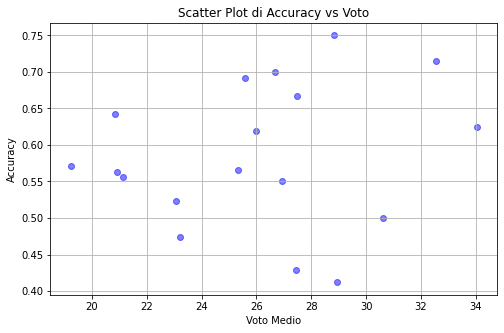

In [51]:
import matplotlib.pyplot as plt

# Creazione dello scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_merged['voto'], df_merged['accuracy'], color='blue', alpha=0.5)

# Aggiungiamo titoli agli assi e al grafico
plt.title('Scatter Plot di Accuracy vs Voto')
plt.xlabel('Voto Medio')
plt.ylabel('Accuracy')

# Mostra il grafico
plt.grid(True)
plt.show()

In [52]:
voti = [voto for _, voto in lista_voti_medio]

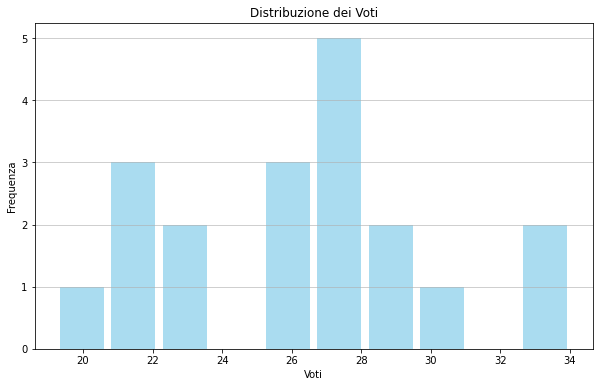

In [61]:
# Creiamo un histogramma dei voti
plt.figure(figsize=(10, 6))
plt.hist(voti, bins=10, color='skyblue', alpha=0.7, rwidth=0.85)
plt.title('Distribuzione dei Voti')
plt.xlabel('Voti')
plt.ylabel('Frequenza')
plt.grid(axis='y', alpha=0.75)

# Mostra il grafico
plt.show()

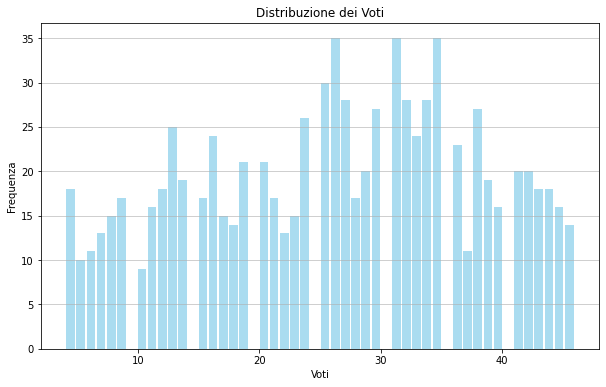

In [59]:
# Creiamo un histogramma dei voti
plt.figure(figsize=(10, 6))
plt.hist(data['voto'], bins=50, color='skyblue', alpha=0.7, rwidth=0.85)
plt.title('Distribuzione dei Voti')
plt.xlabel('Voti')
plt.ylabel('Frequenza')
plt.grid(axis='y', alpha=0.75)


# Mostra il grafico
plt.show()